In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report,confusion_matrix

1. Read the column description and ensure you understand each attribute well

In [2]:
cls_details = pd.read_excel("TheraBank_Column_Description.xlsx", skiprows=[0,1,2,3,4,5], usecols=[1, 2])
cls_details

,Unnamed: 1,Unnamed: 2
0,ID,Customer ID
1,Age,Customer's age in completed years
2,Experience,#years of professional experience
3,Income,Annual income of the customer ($000)
4,ZIPCode,Home Address ZIP code.
5,Family,Family size of the customer
6,CCAvg,Avg. spending on credit cards per month ($000)
7,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...
8,Mortgage,Value of house mortgage if any. ($000)
9,Personal Loan,Did this customer accept the personal loan off...


2. Study the data distribution in each attribute, share your findings.

In [3]:
data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


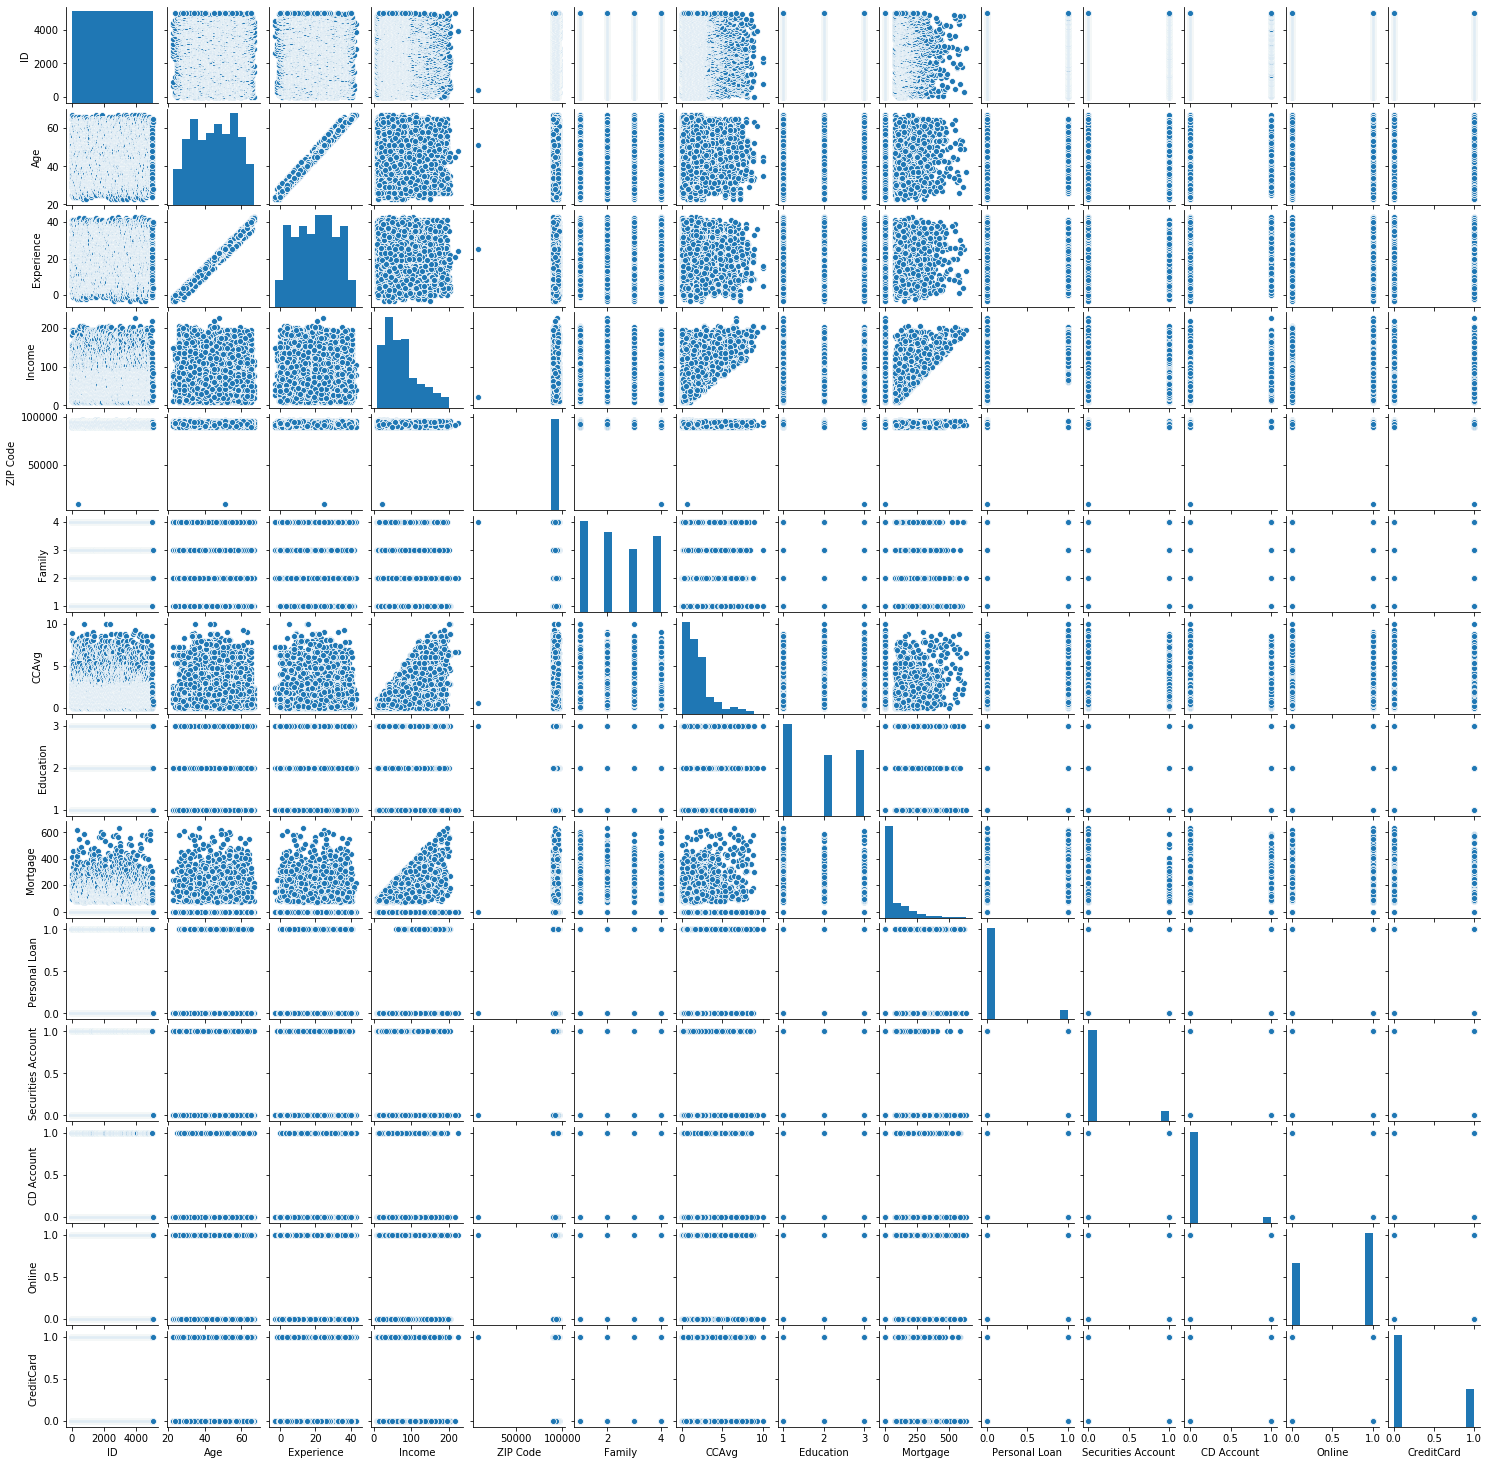

In [5]:
graph = sns.pairplot(data)
graph.fig.set_size_inches(20,20)

Findings:
1. The Age and Experience are having a linear relationship.
2. 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard' are all the categorical variable (in integer format) and hence we don't see any distribution pattern.
3. Income, CCAvg, Mortgage is right skew.

3. Get the target column distribution. Your comments. 

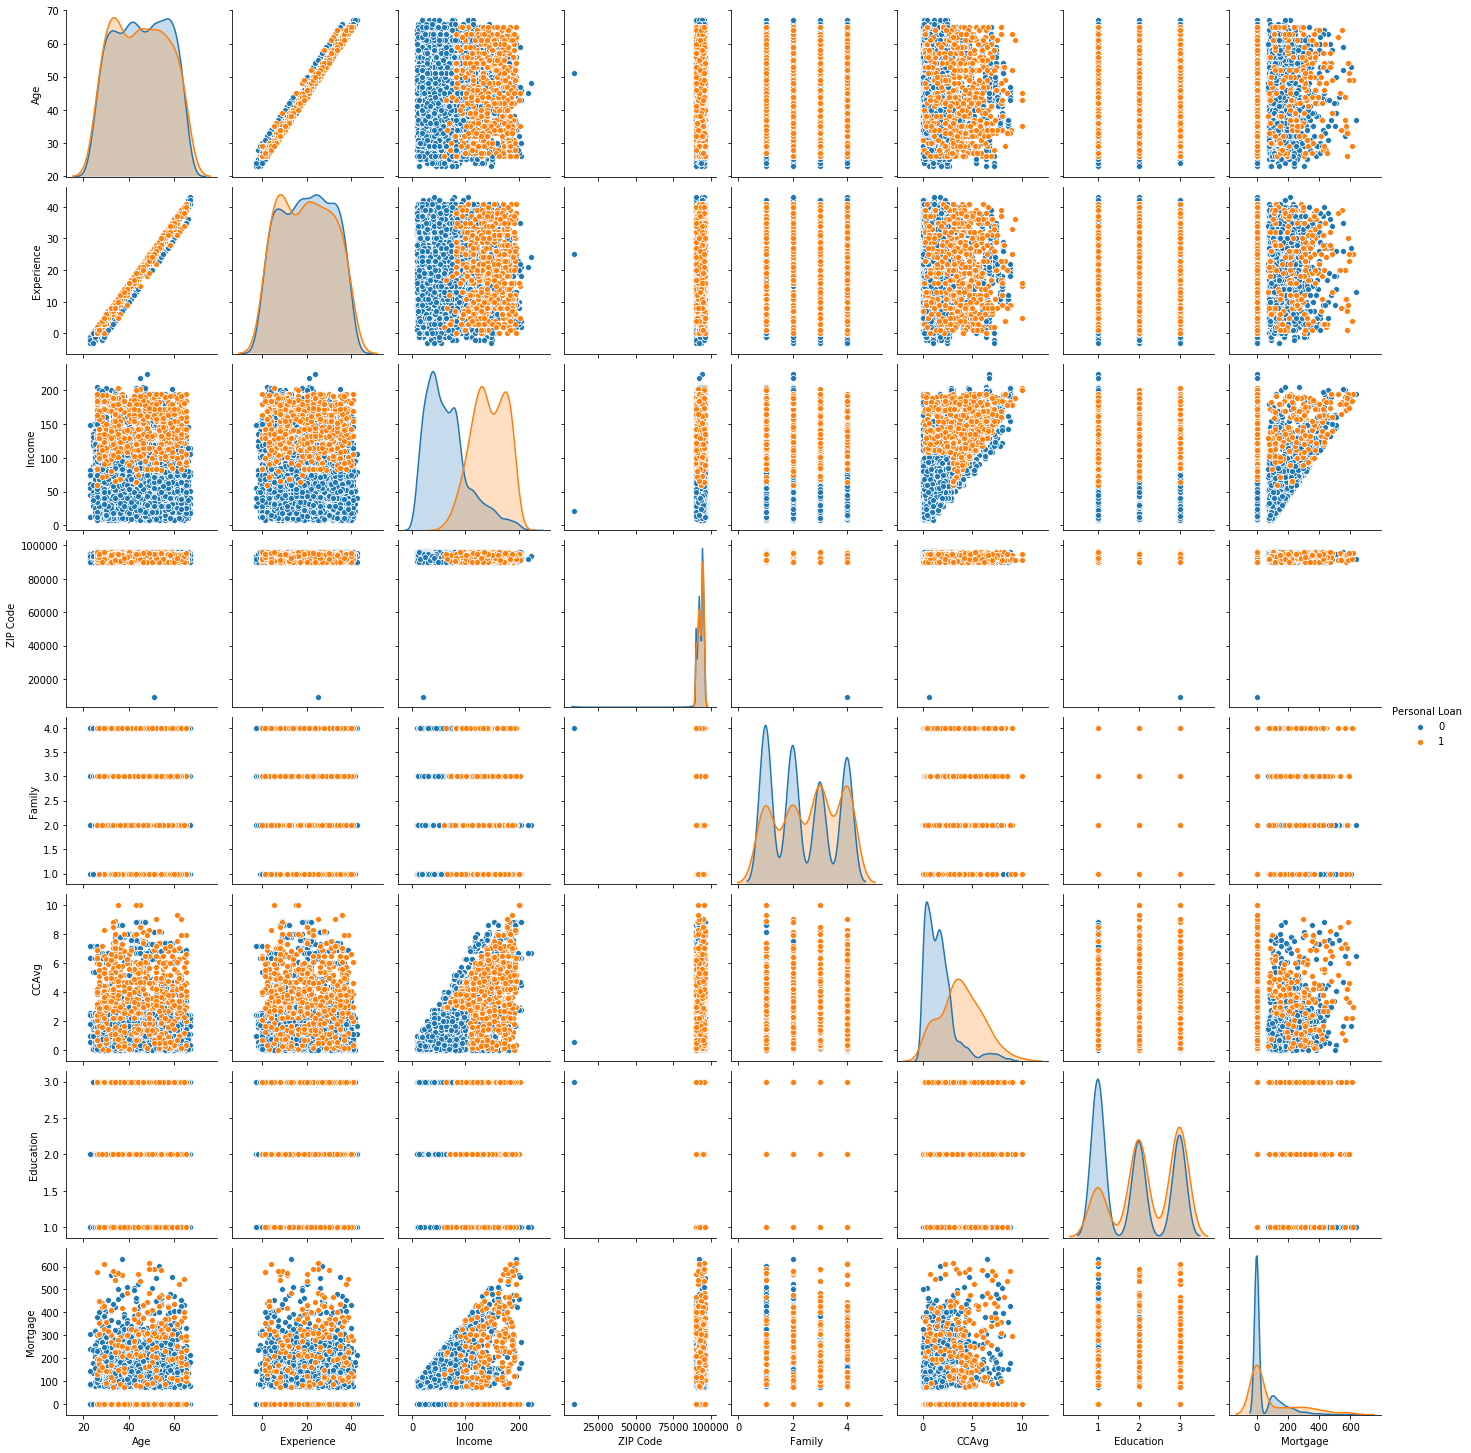

In [6]:
graph = sns.pairplot(data, hue="Personal Loan", vars=['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage'])
graph.fig.set_size_inches(20,20)

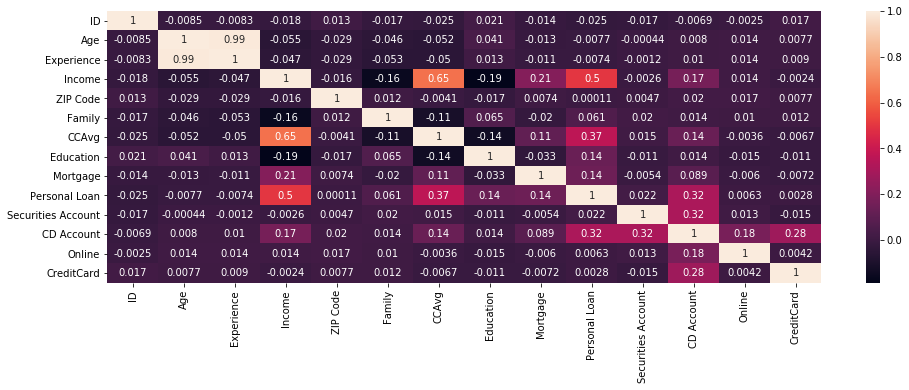

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(), annot=True)

Findings:

1. Personal Loan - Income is having the higest correlation. Meaning Income feature is seprating the Personal Loan class better then others attribute.

2. Other then Income, CCAvg and CD Account is also having comprativlty better Personal Loan class sepration as compare to others.

4. Split the data into training and test set in the ratio of 70:30 respectively 

In [8]:
data.drop("ID", axis=1, inplace=True)
X = data.drop("Personal Loan", axis=1)
y = data["Personal Loan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the
likelihood of a liability customer buying personal loans (10 points)

In [9]:
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

In [10]:
print("LogisticRegression:")
log = LogisticRegression()
log.fit(scaledX_train,y_train)
print("Testing Accuracy")
print(log.score(scaledX_test,y_test))
print("Training Accuracy")
print(log.score(scaledX_train,y_train))

LogisticRegression:
Testing Accuracy
0.948
Training Accuracy
0.9534285714285714


In [11]:
print("KNeighborsClassifier:")
knn = KNeighborsClassifier()
knn.fit(scaledX_train,y_train)
print("Testing Accuracy")
print(knn.score(scaledX_test,y_test))
print("Training Accuracy")
print(knn.score(scaledX_train,y_train))

KNeighborsClassifier:
Testing Accuracy
0.9493333333333334
Training Accuracy
0.9702857142857143


In [13]:
print("Naive Bayes:")
gnb = GaussianNB()
gnb.fit(scaledX_train,y_train)
print("Testing Accuracy")
print(gnb.score(scaledX_test,y_test))
print("Training Accuracy")
print(gnb.score(scaledX_train,y_train))

Naive Bayes:
Testing Accuracy
0.8766666666666667
Training Accuracy
0.89


6. Print the confusion matrix for all the above models

In [14]:
print("Logistic:")
print("")
print(confusion_matrix(y_test,log.predict(scaledX_test)))
print("")
print("KNeighborsClassifier:")
print("")
print(confusion_matrix(y_test,knn.predict(scaledX_test)))
print("")
print("Naive Bayes:")
print("")
print(confusion_matrix(y_test,gnb.predict(scaledX_test)))

Logistic:

[[1335   16]
 [  62   87]]

KNeighborsClassifier:

[[1345    6]
 [  70   79]]

Naive Bayes:

[[1231  120]
 [  65   84]]


7. Give your reasoning on which is the best model in this case and why it performs
better?

As per the Testing Accuracy KNN is giving us the best model.

The reason it outperformed the other 2 models -

1. Naive Bayes assumes feature are independnet whereas that is not the case here.
2. Logistic doesn't perform well for non-linear solution.